In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Define image size and directories
IMAGE_SIZE = [224, 224]  # VGG19 uses 224x224 input size
train_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\val"

In [3]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 1920 images belonging to 10 classes.
Found 880 images belonging to 10 classes.


In [6]:
# Add preprocessing layer to the front of VGG19
vgg19 = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [7]:
# Freeze the layers
for layer in vgg19.layers:
    layer.trainable = False

# Global Average Pooling
x = GlobalAveragePooling2D()(vgg19.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg19.input, outputs=output_tensor)

In [8]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
60/60 [==============================] - 498s 8s/step - loss: 1.9203 - accuracy: 0.3766 - val_loss: 1.6131 - val_accuracy: 0.4443
Epoch 2/10
60/60 [==============================] - 545s 9s/step - loss: 1.4350 - accuracy: 0.5766 - val_loss: 1.2145 - val_accuracy: 0.6432
Epoch 3/10
60/60 [==============================] - 414s 7s/step - loss: 1.1977 - accuracy: 0.6495 - val_loss: 1.0168 - val_accuracy: 0.6909
Epoch 4/10
60/60 [==============================] - 363s 6s/step - loss: 1.0497 - accuracy: 0.6870 - val_loss: 0.9351 - val_accuracy: 0.6739
Epoch 5/10
60/60 [==============================] - 369s 6s/step - loss: 0.9518 - accuracy: 0.7182 - val_loss: 0.8472 - val_accuracy: 0.7193
Epoch 6/10
60/60 [==============================] - 398s 7s/step - loss: 0.8679 - accuracy: 0.7286 - val_loss: 0.7291 - val_accuracy: 0.8057
Epoch 7/10
60/60 [==============================] - 363s 6s/step - loss: 0.8189 - accuracy: 0.7427 - val_loss: 0.7111 - val_accuracy: 0.7852
Epoch 8/10
60

In [13]:
# Save the model
model.save('melon_species_vgg19.h5')

import matplotlib.pyplot as plt

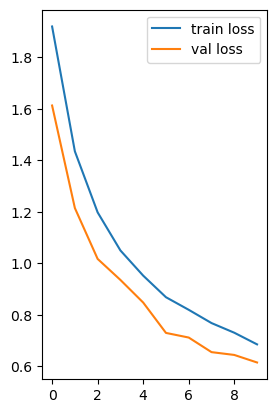

In [14]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

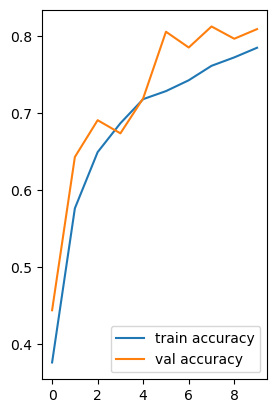

In [15]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()